In [102]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [73]:
#read both DF
df_mouse = pd.read_csv("Mouse_metadata.csv")
df_study = pd.read_csv("Study_results.csv")


In [74]:
df_study.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [75]:
#merge the DFs on the Mouse ID col
df_both = df_mouse.merge(df_study, how='right', on = 'Mouse ID')
df_both.head(50)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      b128    Capomulin  Female           9          22          0   
1      f932     Ketapril    Male          15          29          0   
2      g107     Ketapril  Female           2          29          0   
3      a457     Ketapril  Female          11          30          0   
4      c819     Ketapril    Male          21          25          0   
5      h246     Ketapril    Male          13          30          0   
6      p189     Ketapril    Male           8          28          0   
7      n923     Ketapril    Male          19          30          0   
8      q119     Ketapril    Male          17          30          0   
9      f993     Naftisol    Male          21          28          0   
10     z234     Naftisol  Female          19          27          0   
11     b559     Naftisol    Male          20          26          0   
12     y260     Ketapril  Female           7          25          0   
13     x930     Naftisol    Male          13          26          0   
14     o725     Naftisol    Male           4          26          0   
15     z969     Naftisol    Male           9          30          0   
16     v835     Naftisol    Male           7          29          0   
17     r604     Naftisol    Male           7          30          0   
18     n304     Naftisol    Male           9          26          0   
19     l700     Naftisol  Female          18          27          0   
20     x336     Naftisol  Female           4          29          0   
21     l725     Naftisol  Female           8          26          0   
22     m133     Naftisol  Female           2          26          0   
23     v295     Naftisol  Female           2          27          0   
24     a818     Naftisol  Female          12          28          0   
25     y601     Naftisol  Female          23          25          0   
26     t724     Naftisol  Female           2          25          0   
27     k382     Ketapril    Male          22          29          0   
28     w422     Ketapril  Female          18          26          0   
29     c326    Infubinol  Female          18          25          0   
30     c139    Infubinol    Male          11          28          0   
31     v339    Infubinol    Male          20          26          0   
32     a577    Infubinol  Female           6          25          0   
33     y163    Infubinol  Female          17          27          0   
34     k483    Infubinol  Female          20          30          0   
35     k804    Infubinol  Female          23          29          0   
36     o809    Infubinol    Male           3          25          0   
37     z581    Infubinol  Female          24          25          0   
38     a251    Infubinol  Female          21          25          0   
39     i386    Infubinol  Female          23          29          0   
40     c580     Ketapril    Male          22          25          0   
41     q132    Infubinol  Female           1          30          0   
42     u327     Ketapril    Male          17          25          0   
43     v603     Ketapril  Female          22          30          0   
44     f278     Ketapril    Male          12          30          0   
45     g497     Ketapril    Male          19          28          0   
46     d474     Ketapril    Male          18          27          0   
47     o973     Ketapril  Female          11          29          0   
48     c832     Ketapril    Male          18          29          0   
49     o331     Ketapril    Male          24          30          0   

    Tumor Volume (mm3)  Metastatic Sites  
0                 45.0                 0  
1                 45.0                 0  
2                 45.0                 0  
3                 45.0                 0  
4                 45.0                 0  
5                 45.0                 0  
6                 45.0                 0  
7                 45.0               

In [76]:
#Display the number of unique mice IDs in the data,
len(df_both['Mouse ID'].unique())

249

In [77]:
#return rows that have the same mouse ID and timepoint values
df_both[df_both.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            47.570392                 0  
620            51.745156                 0  
681            49.880528                 0  
815            51.325852                 1  
869            53.442020                 0  
950            55.326122                 1  
1111           54.657650                 1

In [78]:
#drop duplicates- same mouse ID and timepoint value
#this mice is a complete throw away bc beginning timepoints arent present 

df_dropped = df_both.loc[df_both["Mouse ID"] != "g989"]
df_dropped


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
1        f932     Ketapril    Male          15          29          0   
2        g107     Ketapril  Female           2          29          0   
3        a457     Ketapril  Female          11          30          0   
4        c819     Ketapril    Male          21          25          0   
...       ...          ...     ...         ...         ...        ...   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   
1891     x773      Placebo  Female          21          30         45   
1892     b879     Stelasyn  Female           4          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              45.000000                 0  
2              45.000000                 0  
3              45.000000                 0  
4              45.000000                 0  
...                  ...               ...  
1888           41.581521                 2  
1889           31.023923                 3  
1890           61.433892                 1  
1891           58.634971                 4  
1892           72.555239                 2  

[1880 rows x 8 columns]

In [79]:
#updated unique mouse IDs
#Display the number of unique mice IDs in the data

len(df_dropped['Mouse ID'].unique())


248

In [105]:
#summary stats
summary_table = df_dropped.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

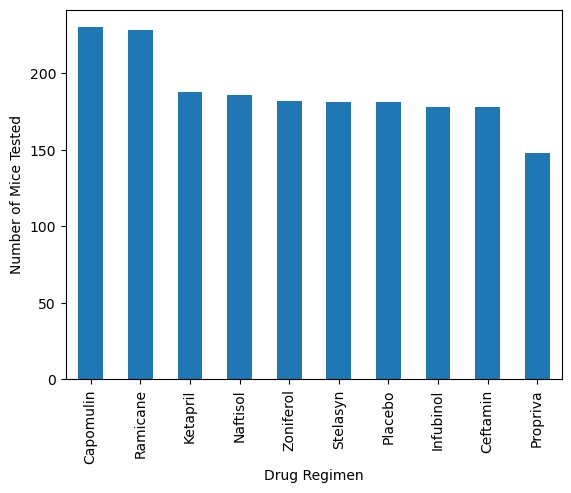

In [82]:
#Create the first bar chart with the Pandas DataFrame.plot() method.
counts = df_dropped['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()


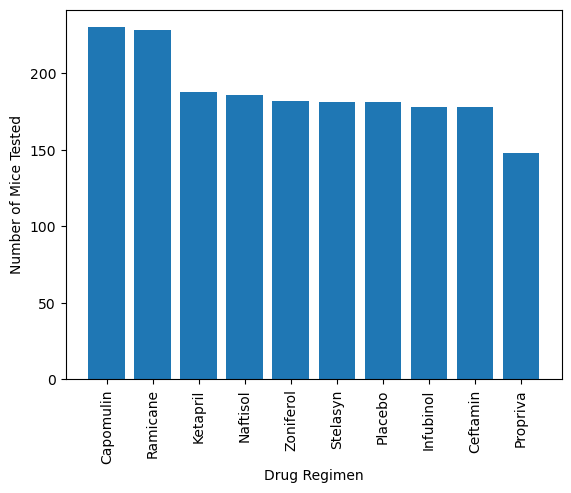

In [83]:
#plt method
counts = df_dropped['Drug Regimen'].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()




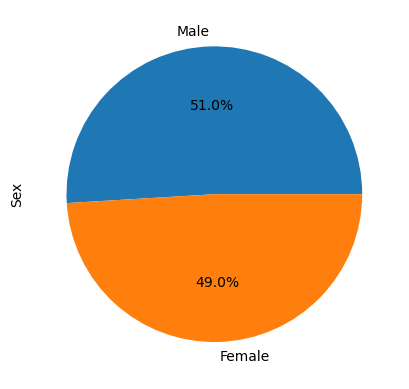

In [84]:
#pandas method
counts = df_dropped.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()


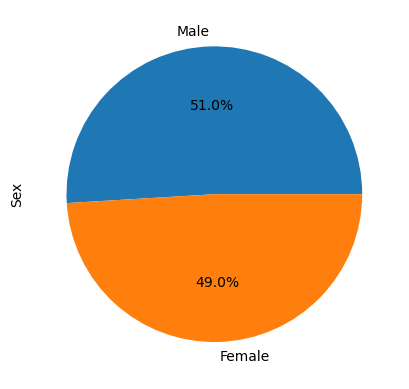

In [106]:
#plt method
counts = df_dropped.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


In [88]:
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 

greatest_tp = df_dropped.groupby(["Mouse ID"])['Timepoint'].max()
greatest_tp


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [89]:
#Merge this grouped DataFrame with the original cleaned DataFrame.
df_merge = df_dropped.merge(greatest_tp, how = 'right', on = ['Mouse ID', 'Timepoint'] )

df_merge



Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       a203    Infubinol  Female          20          23         45   
1       a251    Infubinol  Female          21          25         45   
2       a262      Placebo  Female          17          29         45   
3       a275     Ceftamin  Female          20          28         45   
4       a366     Stelasyn  Female          16          29         30   
..       ...          ...     ...         ...         ...        ...   
243     z435     Propriva  Female          12          26         10   
244     z578     Ramicane    Male          11          16         45   
245     z581    Infubinol  Female          24          25         45   
246     z795     Naftisol  Female          13          29         45   
247     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [90]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_volume_data = []

In [91]:
#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.
for drug in top_4:
    
    final_tumor_vol = df_merge.loc[df_merge["Drug Regimen"] == drug, 'Tumor Volume (mm3)'] #returns a series


    #Append the resulting final tumor volumes for each drug to the empty list.
    tumor_volume_data.append(final_tumor_vol)
    
    #Determine outliers by using the upper and lower bounds, and then print the results.
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


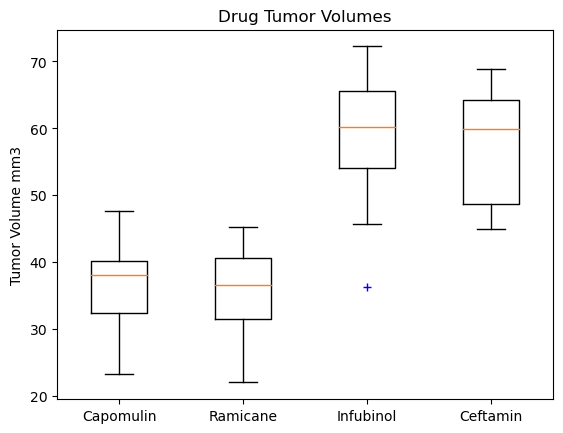

In [108]:
#Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. 
#Highlight any potential outliers in the plot by changing their color and style

plt.boxplot(tumor_volume_data, labels = top_4, sym = 'b+')
plt.title('Drug Tumor Volumes')
plt.ylabel('Tumor Volume mm3')

plt.show()


Text(0.5, 1.0, 'Tumor volume versus time point for Capomulin treated mouse')

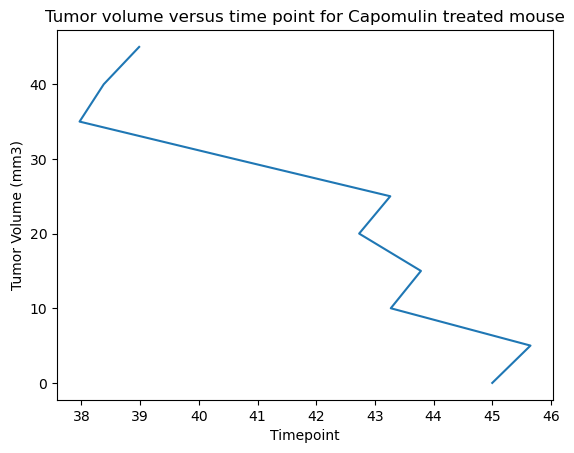

In [109]:
#Select a mouse that was treated with Capomulin, and 
#generate a line plot of tumor volume versus time point for that mouse.

df_capomulin_single = df_dropped.loc[df_both["Mouse ID"] == "b128"]

plt.plot(df_capomulin_single['Tumor Volume (mm3)'], df_capomulin_single['Timepoint'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Tumor volume versus time point for Capomulin treated mouse')




In [112]:
#linear regression model between mouse weight and average tumor volume for the Capomulin treatment.
df_capomulin = df_dropped.loc[df_both["Drug Regimen"] == "Capomulin"]
df_capomulin = df_capomulin.sort_values(['Mouse ID', 'Timepoint'])

mean_tumor = df_capomulin.groupby(["Mouse ID"]).mean()
mean_tumor


Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Mouse ID                                                          
b128             9.0        22.0       22.5           41.963636   
b742             7.0        21.0       22.5           40.083699   
f966            16.0        17.0       10.0           36.505973   
g288             3.0        19.0       22.5           41.990097   
g316            22.0        22.0       22.5           44.613344   
i557             1.0        24.0       22.5           44.805810   
i738            23.0        20.0       22.5           39.141053   
j119             7.0        23.0       22.5           44.465236   
j246            21.0        21.0       17.5           43.216925   
l509            17.0        21.0       22.5           44.434474   
l897            17.0        19.0       22.5           42.507261   
m601            22.0        17.0       22.5           34.847470   
m957             3.0        19.0       22.5           39.049816   
r157            22.0        25.0        7.5           45.798970   
r554             8.0        17.0       22.5           36.509212   
r944            12.0        25.0       22.5           43.367364   
s185             3.0        17.0       22.5           34.559143   
s710             1.0        23.0       22.5           42.803733   
t565            20.0        17.0       22.5           39.328725   
u364            18.0        17.0       22.5           39.887495   
v923            19.0        21.0       22.5           41.581595   
w150            23.0        23.0        5.0           41.384825   
w914            24.0        21.0       22.5           41.352452   
x401            16.0        15.0       22.5           36.182040   
y793            17.0        17.0       22.5           38.506829   

          Metastatic Sites  
Mouse ID                    
b128                  0.70  
b742                  0.00  
f966                  0.00  
g288                  0.80  
g316                  1.00  
i557                  0.20  
i738                  0.60  
j119                  0.60  
j246                  0.25  
l509                  1.40  
l897                  0.40  
m601                  0.90  
m957                  0.90  
r157                  0.00  
r554                  2.20  
r944                  0.90  
s185                  0.40  
s710                  0.60  
t565                  0.00  
u364                  1.80  
v923                  0.90  
w150                  0.00  
w914                  0.50  
x401                  0.00  
y793                  1.40

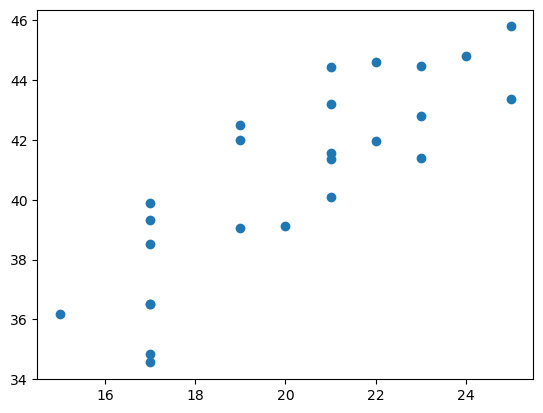

In [96]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
plt.scatter(mean_tumor['Weight (g)'], mean_tumor['Tumor Volume (mm3)'])

In [97]:
#Calculate the correlation coefficient and 
mouse_weight = mean_tumor.iloc[:,1]
tumor_volume = mean_tumor.iloc[:,3]
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


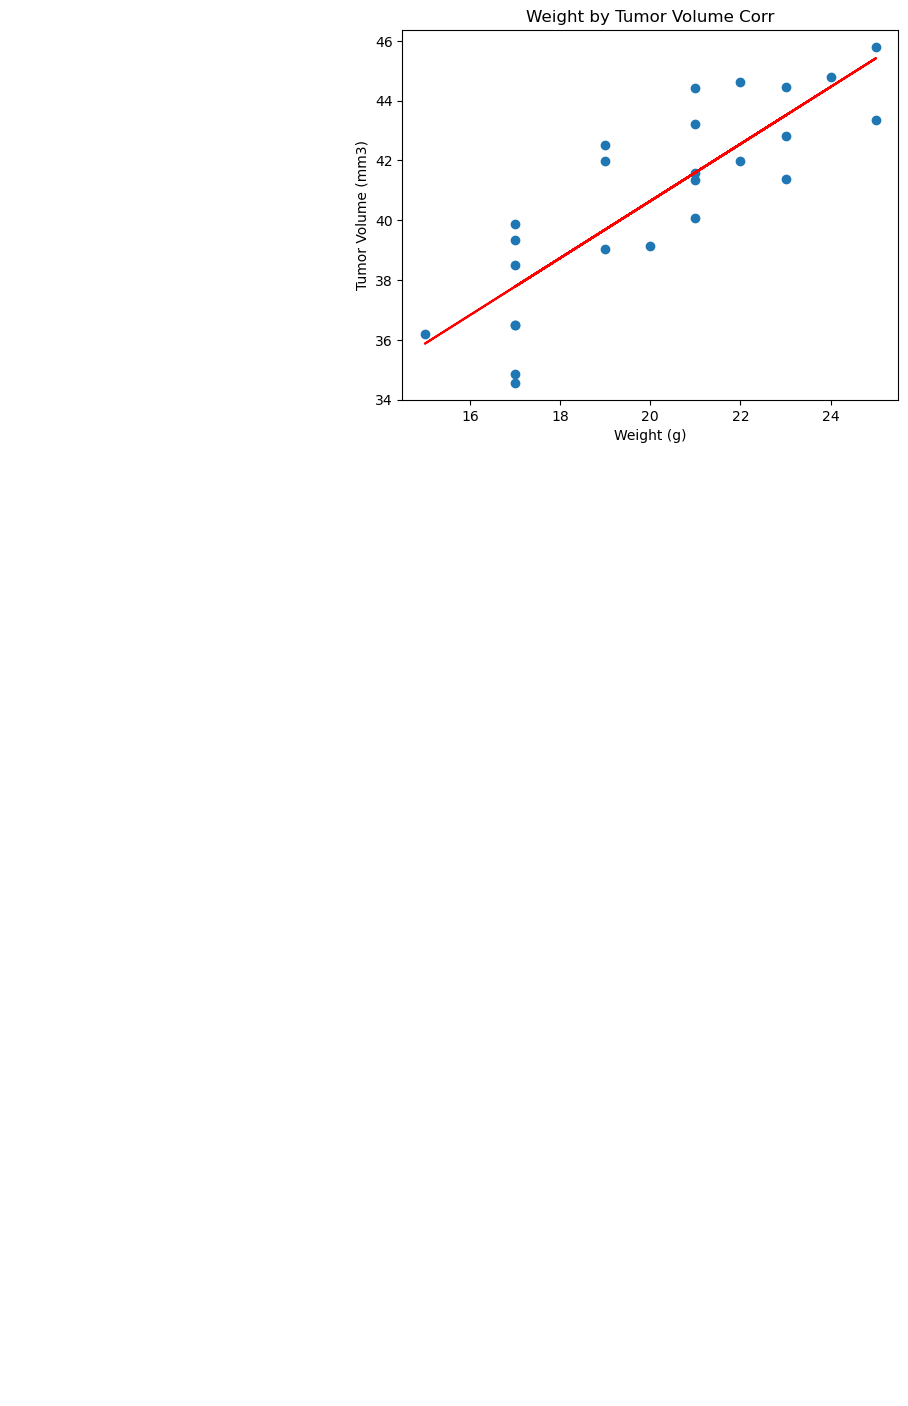

In [104]:
#linear regression model between mouse weight and average tumor volume for the Capomulin treatment.

# Add the linear regression equation and line to plot
x_values = mean_tumor['Weight (g)']
y_values = mean_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight by Tumor Volume Corr')
plt.show()

